In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import missingno as msno 

dashes = dashes='---'*20

In [3]:
"""
amount_tsh : Total static head (amount water available to waterpoint)
date_recorded : The date the row was entered
funder : Who funded the well
gps_height : Altitude of the well
installer : Organization that installed the well
longitude : GPS coordinate
latitude : GPS coordinate
wpt_name : Name of the waterpoint if there is one
num_private :Private use or not
basin : Geographic water basin
subvillage : Geographic location
region : Geographic location
region_code : Geographic location (coded)
district_code : Geographic location (coded)
lga : Geographic location
ward : Geographic location
population : Population around the well
public_meeting : True/False
recorded_by : Group entering this row of data
scheme_management : Who operates the waterpoint
scheme_name : Who operates the waterpoint
permit : If the waterpoint is permitted
construction_year : Year the waterpoint was constructed
extraction_type : The kind of extraction the waterpoint uses
extraction_type_group : The kind of extraction the waterpoint uses
extraction_type_class : The kind of extraction the waterpoint uses
management : How the waterpoint is managed
management_group : How the waterpoint is managed
payment : What the water costs
payment_type : What the water costs
water_quality : The quality of the water
quality_group : The quality of the water
quantity : The quantity of water
quantity_group : The quantity of water
source : The source of the water
source_type : The source of the water
source_class : The source of the water
waterpoint_type : The kind of waterpoint
waterpoint_type_group : The kind of waterpoint"""

#Goal build a model that predicts the functionality of water points

#pd.set_option('display.max_columns', None)  
df = pd.read_csv('data/water_table.csv')
labels = pd.read_csv('data/water_table_labels.csv')

In [4]:
labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [5]:
df['target']= labels['status_group']

In [6]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
#convert sex column to binary encoding
#dictionary t oreplace values
df['target'] = df['target'].map({'functional':0,'non functional':1,'functional needs repair':2})
df.head()
df.drop('id',axis=1, inplace=True)

In [8]:
pd.set_option('display.max_columns', None)
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


In [9]:
# cols_drop = ['wpt_name','subvillage','ward','scheme_name','date_recorded']
# df = df.drop(cols_drop,axis=1)

In [10]:
df.shape

(59400, 40)

In [11]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

### Data Visualization

#### Target
The column 'target' is a multiclass label.  0 stands for functioning, 1 means non-functioning and 2 means functioning but in need of repair.  54% of the wells are functioning.  38% of the wells are not functioning and 7% are functioning but in need of repair.<br>
The column is imbalanced.

In [12]:
def feature_distribution(data, col = None,ticklabels=None, figsize=None):
    """
    plots a seaborn distplot for column w/customization
    Args
    df (df)
    col (int)
    ticklabels (dict)
    figsize (dict)
    
    """
    print(data[col].value_counts(dropna=False))
    print('\n')
    print(round(data[col].value_counts(normalize=True),3))
    dashes = dashes='---'*15
    print(dashes)
    
#     if hist_kws == None:
#         {'alpha':0.5,'edgecolor':'black'}

    #order = pd.crosstab(data[col].sort_values('Classic', ascending=False).index

    fig,ax = plt.subplots(figsize=figsize)
    sns.countplot(data[col], ax=ax)

    label_font = {'weight':'bold','size':15}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
    ax.set_xticklabels(ticklabels)

0    32259
1    22824
2     4317
Name: target, dtype: int64


0    0.543
1    0.384
2    0.073
Name: target, dtype: float64
---------------------------------------------


/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


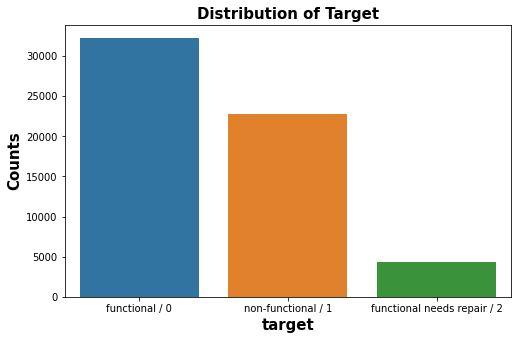

In [13]:
feature_distribution(df, col='target', ticklabels=['functional / 0','non-functional / 1','functional needs repair / 2'],figsize=(8,5))

#### date_recorded / construction_year
date_recorded : The date the row was entered<br>
construction_year : Year the waterpoint was constructed<br>

In [14]:
"""
NaN: 0 
'0': 0
"""
df['date_recorded'].value_counts(dropna=False)

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-21      1
2004-04-05      1
2013-01-06      1
2011-09-09      1
2011-09-19      1
Name: date_recorded, Length: 356, dtype: int64

In [15]:
df['date_recorded'].isna().sum()

0

In [16]:
df[df['date_recorded']=='0']

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target


In [17]:
print(df['date_recorded'].min())
print(df['date_recorded'].max())

2002-10-14
2013-12-03


In [18]:
df['construction_year'].value_counts(dropna=False)

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [19]:
"""
34% of feature is 0 value
2010 is 4%.

NaN: 0
"""
df['construction_year'].value_counts(normalize=True)

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

In [20]:
df['construction_year'].isna().sum()

0

#### Target and Basins
different classes of pumps in different basins<br>

In [21]:
df['basin'].value_counts(dropna=False)

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [22]:
df['basin'].isna().sum()

0

In [23]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [24]:
#df_pivot = pd.concat([df, df['target']], axis=1)
#piv_df= df[['basin','target','construction_year']]
piv_df= df[['basin','target','construction_year']]
piv_table = piv_df.pivot_table(index='basin',
                           columns='target', aggfunc='count')
piv_table

construction_year           
target                                  0     1    2
basin                                               
Internal                             4482  2746  557
Lake Nyasa                           3324  1511  250
Lake Rukwa                           1000  1184  270
Lake Tanganyika                      3107  2583  742
Lake Victoria                        5100  4159  989
Pangani                              5372  3091  477
Rufiji                               5068  2471  437
Ruvuma / Southern Coast              1670  2497  326
Wami / Ruvu                          3136  2582  269

In [25]:
"""
checking the functionality against the type of water:
"""
#df_pivot = pd.concat([df_train_features, df_train_labels], axis=1)
piv_df= df[['water_quality','target','basin']]
piv_table = piv_df.pivot_table(index='water_quality',
                           columns='target', aggfunc='count')
piv_table

basin                 
target                    0        1       2
water_quality                               
coloured              246.0    190.0    54.0
fluoride              151.0     36.0    13.0
fluoride abandoned      6.0     11.0     NaN
milky                 438.0    352.0    14.0
salty                2220.0   2411.0   225.0
salty abandoned       174.0     93.0    72.0
soft                28760.0  18154.0  3904.0
unknown               264.0   1577.0    35.0

In [26]:
"""
0: 20709

"""
df[df['construction_year']==0]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
6,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1
7,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1
8,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,1
9,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Chamkube,0,Lake Victoria,Songambele,Kagera,18,30,Ngara,Nyamiyaga,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,1
59392,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,Lake Rukwa,Mbuyuni A,Mbeya,12,1,Chunya,Mbuyuni,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
59393,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,Internal,Masanga,Tabora,14,2,Igunga,Igunga,0,False,GeoData Consultants Ltd,Water authority,NaN,False,0,gravity,gravity,gravity,private operator,commercial,pay per bucket,per bucket,soft,good,insufficient,insufficient,dam,dam,surface,other,other,0
59397,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,0


In [27]:
print(df['construction_year'].min())
print(df['construction_year'].max())

0
2013


In [28]:

#df_pivot = pd.concat([df_train_features, df_train_labels], axis=1)
piv_df= df[['basin','target','construction_year']]
piv_table = piv_df.pivot_table(index='basin',
                           columns='target', aggfunc='count')
piv_table

construction_year           
target                                  0     1    2
basin                                               
Internal                             4482  2746  557
Lake Nyasa                           3324  1511  250
Lake Rukwa                           1000  1184  270
Lake Tanganyika                      3107  2583  742
Lake Victoria                        5100  4159  989
Pangani                              5372  3091  477
Rufiji                               5068  2471  437
Ruvuma / Southern Coast              1670  2497  326
Wami / Ruvu                          3136  2582  269

#### Quantity
Quantity is defined as the quantity of water.  Based on the below, wells with enough water had the most functioning wells.  However, the wells with enough water also had the highest number of non-functioning wells. <br>

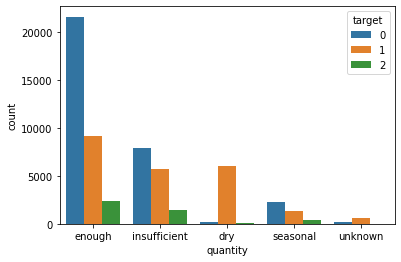

In [29]:
def plot_top_n(df):
    fig,ax = plt.subplots()
    sns.countplot(data=df, x='quantity', hue='target');
    
plot_top_n(df)    

### Water_Quality
water_quality is defined as the quality of the water.

In [30]:
df['water_quality'].value_counts(dropna=False)

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [31]:
def plot_top_n(df, x_lab, hue_lab, title='Regions with Permit Status'):
#plt.figure(figsize=(12,12))
    fig,ax = plt.subplots(figsize=(12,12))
    sns.countplot(x=x_lab, hue=hue_lab, data=df, palette="muted",ax=ax)

    #set the xtick labels to rotate
    #fixed rotation of axis labels
    ax.set_xticklabels(ax.get_xticklabels(), fontdict={'rotation':40,'ha':'right'});

    #set the title/ax labels
    #created dictionary that had properties for axis labels
    axlabels = dict(fontsize=14, fontweight='semibold')
    
    ax.set_ylabel('Count', fontdict=axlabels)
    ax.set_xlabel('Powers',fontdict=axlabels)
    
    ax.set_title(title, fontdict=dict(fontsize=15,weight='bold',color='red'))

    fig = ax.get_figure()
    
    return fig, ax    

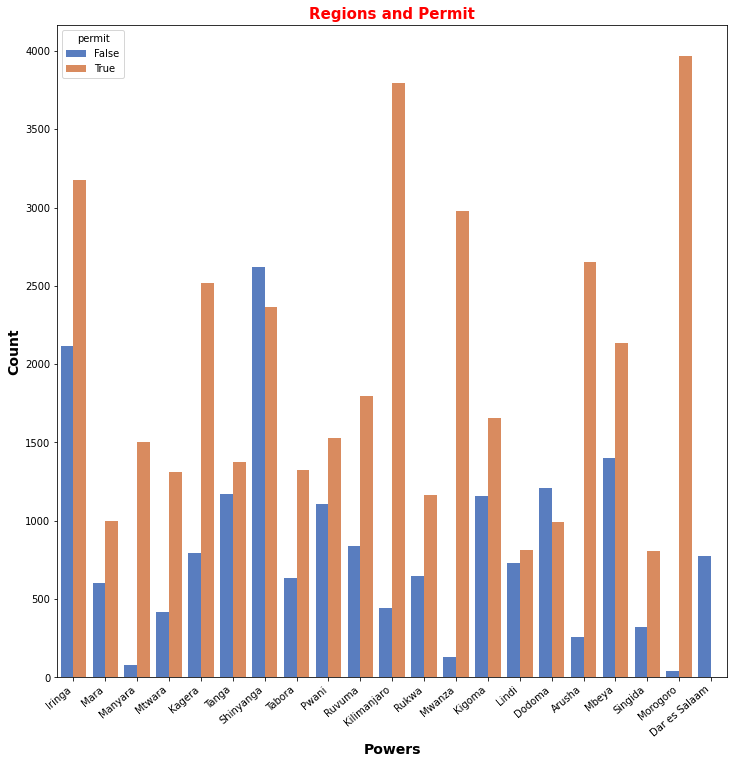

In [32]:
fig,ax = plot_top_n(df,x_lab='region', hue_lab='permit',title='Regions and Permit')

In [33]:
df.groupby('water_quality').get_group('soft')[df.columns].sum()

amount_tsh                                                      1.7732e+07
date_recorded            2011-03-142013-03-062013-02-252013-01-282011-0...
gps_height                                                        36011883
longitude                                                      1.73331e+06
latitude                                                           -292396
wpt_name                 noneZahanatiKwa MahundiZahanati Ya NanyumbuShu...
num_private                                                          25222
basin                    Lake NyasaLake VictoriaPanganiRuvuma / Souther...
region                   IringaMaraManyaraMtwaraKageraShinyangaKageraRu...
region_code                                                         745149
district_code                                                       275081
lga                      LudewaSerengetiSimanjiroNanyumbuKaragweShinyan...
ward                     MundindiNattaNgorikaNanyumbuNyakasimbiSamuyeKa...
population               

In [34]:
df.groupby(['funder','installer']).count()

amount_tsh  date_recorded  \
funder              installer                                        
0                   0                           777            777   
A/co Germany        TPP TRUSTMOSHI               15             15   
Aar                 AAR                           4              4   
                    COCANE                       27             27   
                    FOLAC                         1              1   
...                                             ...            ...   
Zao                 Zao                           1              1   
Zao Water Spring    Zao water spring              3              3   
Zao Water Spring X  Zao water spring X            1              1   
Zinduka             ZINDUKA                       1              1   
Zingibali Secondary Zingibali Secondary           1              1   

                                         gps_height  longitude  latitude  \
funder              installer                                              
0                   0                           777        777       777   
A/co Germany        TPP TRUSTMOSHI               15         15        15   
Aar                 AAR                           4          4         4   
                    COCANE                       27         27        27   
                    FOLAC                         1          1         1   
...                                             ...        ...       ...   
Zao                 Zao                           1          1         1   
Zao Water Spring    Zao water spring              3          3         3   
Zao Water Spring X  Zao water spring X            1          1         1   
Zinduka             ZINDUKA                       1          1         1   
Zingibali Secondary Zingibali Secondary           1          1         1   

                                         wpt_name  num_private  basin  \
funder              installer                                           
0                   0                         777          777    777   
A/co Germany        TPP TRUSTMOSHI             15           15     15   
Aar                 AAR                         4            4      4   
                    COCANE                     27           27     27   
                    FOLAC                       1            1      1   
...                                           ...          ...    ...   
Zao                 Zao                         1            1      1   
Zao Water Spring    Zao water spring            3            3      3   
Zao Water Spring X  Zao water spring X          1            1      1   
Zinduka             ZINDUKA                     1            1      1   
Zingibali Secondary Zingibali Secondary         1            1      1   

                                         subvillage  region  region_code  \
funder              installer                                              
0                   0                           777     777          777   
A/co Germany        TPP TRUSTMOSHI               15      15           15   
Aar                 AAR                           4       4            4   
                    COCANE                       27      27           27   
                    FOLAC                         1       1            1   
...                                             ...     ...          ...   
Zao                 Zao                           1       1            1   
Zao Water Spring    Zao water spring              3       3            3   
Zao Water Spring X  Zao water spring X            1       1            1   
Zinduka             ZINDUKA                       1       1            1   
Zingibali Secondary Zingibali Secondary           1       1            1   

                                         district_code  lga  ward  population  \
funder              installer                                                   
0                   0                   

In [35]:
#fig,ax = plot_top_n(df,x_lab='installer', hue_lab='target',title='See')

In [36]:
df_3 = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                       'B': ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C': np.random.randn(8),
                       'D': np.random.randn(8)})


In [37]:
df_3

,A,B,C,D
0,foo,one,0.226799,-1.434777
1,bar,one,1.041943,-0.226839
2,foo,two,-1.693915,0.667586
3,bar,three,-0.194226,-2.237410
4,foo,two,0.021441,1.366380
5,bar,two,-0.159165,0.244349
6,foo,one,-1.484346,0.662779
7,foo,three,1.207367,0.089138


In [38]:
df_3.groupby(['A','B']).count()

C  D
A   B          
bar one    1  1
    three  1  1
    two    1  1
foo one    2  2
    three  1  1
    two    2  2

In [39]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
#index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
birds = pd.DataFrame({'Birds': ['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          'status':['Captive', 'Wild', 'Captive', 'Wild'],'Max Speed': [390., 350., 30., 20.]})

In [40]:
birds

,Birds,status,Max Speed
0,Falcon,Captive,390.0
1,Falcon,Wild,350.0
2,Parrot,Captive,30.0
3,Parrot,Wild,20.0


In [41]:
birds.groupby('Birds').count()

,status,Max Speed
Birds,,
Falcon,2,2
Parrot,2,2


In [42]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


In [43]:
select_cols = df[['amount_tsh','gps_height','population','target']]
#sns.pairplot(select_cols);
select_cols.head()

,amount_tsh,gps_height,population,target
0,6000.0,1390,109,0
1,0.0,1399,280,0
2,25.0,686,250,0
3,0.0,263,58,1
4,0.0,0,0,0


#### Construction Year / Year Recorded

In [44]:
df_2 = df.copy()

In [45]:
df_2.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [46]:
#Nan: 0
print(df_2['construction_year'].isna().sum())
print(df_2['construction_year'].dtype)
print(df_2['date_recorded'].dtype)

0
int64
object


In [47]:
#0: 20709
df_2['construction_year'].value_counts(dropna=False)

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

#### construction_year / date_recorded

In [48]:
df_2.replace(0, np.nan, inplace=True)

In [49]:
df_2['construction_year'].isna().sum()

20709

In [50]:
# 'construction_year' - Year the waterpoint was constructed
#Nan: 20709
#years: 1966 - 2010
df_2['construction_year'].value_counts(dropna=False)

NaN       20709
2010.0     2645
2008.0     2613
2009.0     2533
2000.0     2091
2007.0     1587
2006.0     1471
2003.0     1286
2011.0     1256
2004.0     1123
2012.0     1084
2002.0     1075
1978.0     1037
1995.0     1014
2005.0     1011
1999.0      979
1998.0      966
1990.0      954
1985.0      945
1980.0      811
1996.0      811
1984.0      779
1982.0      744
1994.0      738
1972.0      708
1974.0      676
1997.0      644
1992.0      640
1993.0      608
2001.0      540
1988.0      521
1983.0      488
1975.0      437
1986.0      434
1976.0      414
1970.0      411
1991.0      324
1989.0      316
1987.0      302
1981.0      238
1977.0      202
1979.0      192
1973.0      184
2013.0      176
1971.0      145
1960.0      102
1967.0       88
1963.0       85
1968.0       77
1969.0       59
1964.0       40
1962.0       30
1961.0       21
1965.0       19
1966.0       17
Name: construction_year, dtype: int64

In [51]:
# date_recorded  - The date the row was entered
#  NaN: 0
# '0':0
#dates:    2002-10-14 - 2013-12-03
df_2['date_recorded'].value_counts(dropna=False)

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-26      1
2011-08-30      1
2011-09-15      1
2013-01-01      1
2011-09-06      1
Name: date_recorded, Length: 356, dtype: int64

In [52]:
df_2.loc[df_2['date_recorded']=='0']

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target


In [53]:
df_2['date_recorded'].isna().sum()

0

In [58]:
df_2['date_recorded'].min()

'2002-10-14'

In [54]:
# def impute_missing_values(table):
#     my_list=[]
#     for column in table:
#         table.loc[:,column] = np.where(table[column] == 0, table[column] == 'OK', table[column])
#         my_list.append(column)
#     return my_list

In [55]:
#impute_missing_values(df_1)

In [60]:
df['funder'].value_counts(dropna=False)

Government Of Tanzania    9084
NaN                       3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Marumbo Community            1
Norani                       1
Kondela                      1
Csf                          1
Ruangwa Lga                  1
Name: funder, Length: 1898, dtype: int64

In [ ]:
data_d = pd.read_csv('data/water_table.csv')

In [ ]:
len(data_d.loc[data_d['funder']=='0'])

In [ ]:
data_d[data_d['funder']=='0'].sum()

In [ ]:

for col in data_d:
    my_list = []
    if col == '0':
        my_list.append(data_d[col].columns)
    print(my_list)

In [ ]:
data_d.loc[data_d.isin(["0"]).any(axis=1)]

In [ ]:
data_d['population'].value_counts()

In [ ]:
"""
# Prep- convert the zeros in 'funder','installer', and 'population' to NaNs. 
merged_clean = merged.replace({'funder':0, 'installer':0, 'population':0}, np.nan)
merged_clean = merged.replace({'funder':'0', 'installer':'0'}, np.nan)

"""

In [ ]:
"""
# Lump low frequency levels in funder, installer, scheme_name into 'other'
exempt=['amount_tsh',  'gps_height',  'num_private',
       'basin', 'region', 'region_code', 'district_code', 'lga', 'population',
       'public_meeting', 'scheme_management',  'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group']

merged_clean = merged_clean.apply(lambda x: x.mask(x.map(x.value_counts())<20, 'other') if x.name not in exempt else x)

"""

In [ ]:
"""
merged_clean = merged.replace({'construction_year':0}, np.nan)
merged_clean = merged.replace({'construction_year':'0'}, np.nan)
"""

In [ ]:
"""
pd.concat([merged_clean.funder, merged_clean.installer], axis=1)

"""